# Query DB

In [1]:
# Import packages and functions
import pandas as pd
import sqlalchemy

#Create the database engine
con_string = "insert_my_connection_string"
engine = sqlalchemy.engine.create_engine(con_string)

# query and save to dataframe
df = pd.read_sql_query("""select distinct	GEO,
                        REPLACE(CONCAT(Indicator,'_',IndicatorLevel,'_',[Unit of Measure]), ' ', '') as Parameter, sum (Value) as SumValue
                       from [dbo].[censusmat] where SourceTable in 
                       (32100426, 32100432, 32100446 )
                       group by GEO,  REPLACE(CONCAT(Indicator,'_',IndicatorLevel,'_',[Unit of Measure]), ' ', '')""", engine)

# pivot

In [2]:
pivot_tbl = df.pivot(index='GEO', columns='Parameter', values='SumValue')

# view query results

In [3]:
import qgrid
qgrid.show_grid(df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# view pivot results

In [4]:
qgrid.show_grid(pivot_tbl)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# correlations

In [5]:
rho = pivot_tbl.corr()
qgrid.show_grid(rho)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# heat map

In [6]:


import pandas as pd
import numpy as np

corr = pivot_tbl.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

#export CSV
# export_csv = df.to_csv(r'MY_FILE_PATH_TO\pivot_tbl.csv', index = None, header=True) ##Don't forget to add '.csv' at the end of the path
# print(Grants)

Parameter,Bees_Coloniesofhoneybees_Number,Bees_Coloniesofhoneybees_Numberoffarmsreporting,Bees_Gallonsofotherpollinatingbees_Number,Bees_Gallonsofotherpollinatingbees_Numberoffarmsreporting,Pigs_Boars_Numberofanimals,Pigs_Boars_Numberoffarmsreporting,Pigs_Growerandfinishingpigs_Numberofanimals,Pigs_Growerandfinishingpigs_Numberoffarmsreporting,Pigs_Nursingandweanerpigs_Numberofanimals,Pigs_Nursingandweanerpigs_Numberoffarmsreporting,Pigs_Nursingpigs_Numberofanimals,Pigs_Nursingpigs_Numberoffarmsreporting,Pigs_Sowsandgiltsforbreeding_Numberofanimals,Pigs_Sowsandgiltsforbreeding_Numberoffarmsreporting,Pigs_Totalpigs_Numberofanimals,Pigs_Totalpigs_Numberoffarmsreporting,Pigs_Weanerpigs_Numberofanimals,Pigs_Weanerpigs_Numberoffarmsreporting,Technologies_Automatedanimalfeeding_,Technologies_Automatedenvironmentalcontrolsforanimalhousing_,Technologies_Automatedsteering(auto-steer)_,Technologies_Computers/laptopsforfarmmanagement_,"Technologies_GISmapping(e.g.,soilmapping)_",Technologies_GPStechnology_,Technologies_Greenhouseautomation_,Technologies_Othertechnologies_,Technologies_Roboticmilking_,Technologies_Smartphones/tabletsforfarmmanagement_
Parameter,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bees_Coloniesofhoneybees_Number,1,0.923248,0.89514,0.937921,0.947292,0.921403,0.886448,0.894621,0.891128,0.893498,0.893096,0.895182,0.887547,0.925352,0.888055,0.905652,0.882921,0.908821,0.854948,0.859827,0.948703,0.957475,0.922505,0.95007,0.863361,0.930877,0.848939,0.96069
Bees_Coloniesofhoneybees_Numberoffarmsreporting,0.923248,1,0.761896,0.951245,0.953846,0.974849,0.923039,0.964739,0.93188,0.965514,0.925493,0.957959,0.92588,0.97731,0.926313,0.975306,0.928634,0.975042,0.93598,0.950439,0.914879,0.976494,0.962996,0.942396,0.965776,0.973734,0.934915,0.969268
Bees_Gallonsofotherpollinatingbees_Number,0.89514,0.761896,1,0.865677,0.837136,0.772347,0.752054,0.738409,0.753702,0.738394,0.769752,0.745511,0.756072,0.776474,0.751957,0.748214,0.749901,0.755583,0.696515,0.698932,0.878172,0.834559,0.799352,0.857816,0.696367,0.795311,0.688774,0.845736
Bees_Gallonsofotherpollinatingbees_Numberoffarmsreporting,0.937921,0.951245,0.865677,1,0.938731,0.920045,0.890313,0.904461,0.899333,0.90562,0.898956,0.896099,0.891237,0.924443,0.890121,0.917014,0.89542,0.919901,0.879518,0.881765,0.928446,0.952364,0.921806,0.934998,0.903829,0.953292,0.875684,0.952571
Pigs_Boars_Numberofanimals,0.947292,0.953846,0.837136,0.938731,1,0.981015,0.973706,0.971431,0.976079,0.970371,0.973082,0.97361,0.973968,0.981617,0.97545,0.973108,0.972725,0.975233,0.947028,0.950821,0.955598,0.983529,0.978903,0.971878,0.923822,0.975809,0.941923,0.982538
Pigs_Boars_Numberoffarmsreporting,0.921403,0.974849,0.772347,0.920045,0.981015,1,0.967954,0.996006,0.969458,0.996234,0.958152,0.996535,0.962027,0.999777,0.968121,0.997662,0.968816,0.997958,0.972744,0.982341,0.922848,0.980678,0.980442,0.952653,0.949965,0.979301,0.968956,0.97423
Pigs_Growerandfinishingpigs_Numberofanimals,0.886448,0.923039,0.752054,0.890313,0.973706,0.967954,1,0.975305,0.996038,0.973085,0.986761,0.973814,0.991927,0.966823,0.99887,0.970062,0.997344,0.969844,0.974721,0.969037,0.89141,0.941822,0.947257,0.916274,0.908018,0.961854,0.969219,0.937558
Pigs_Growerandfinishingpigs_Numberoffarmsreporting,0.894621,0.964739,0.738409,0.904461,0.971431,0.996006,0.975305,1,0.973392,0.999431,0.95719,0.998037,0.963713,0.995063,0.973613,0.99877,0.97529,0.998194,0.985864,0.992694,0.899719,0.967028,0.972505,0.933841,0.950112,0.975817,0.981277,0.959239
Pigs_Nursingandweanerpigs_Numberofanimals,0.891128,0.93188,0.753702,0.899333,0.976079,0.969458,0.996038,0.973392,1,0.97238,0.994655,0.972894,0.997238,0.968613,0.998657,0.970019,0.998699,0.969123,0.964289,0.96471,0.906002,0.947401,0.954836,0.928262,0.913364,0.958201,0.959615,0.943376


# correlogram

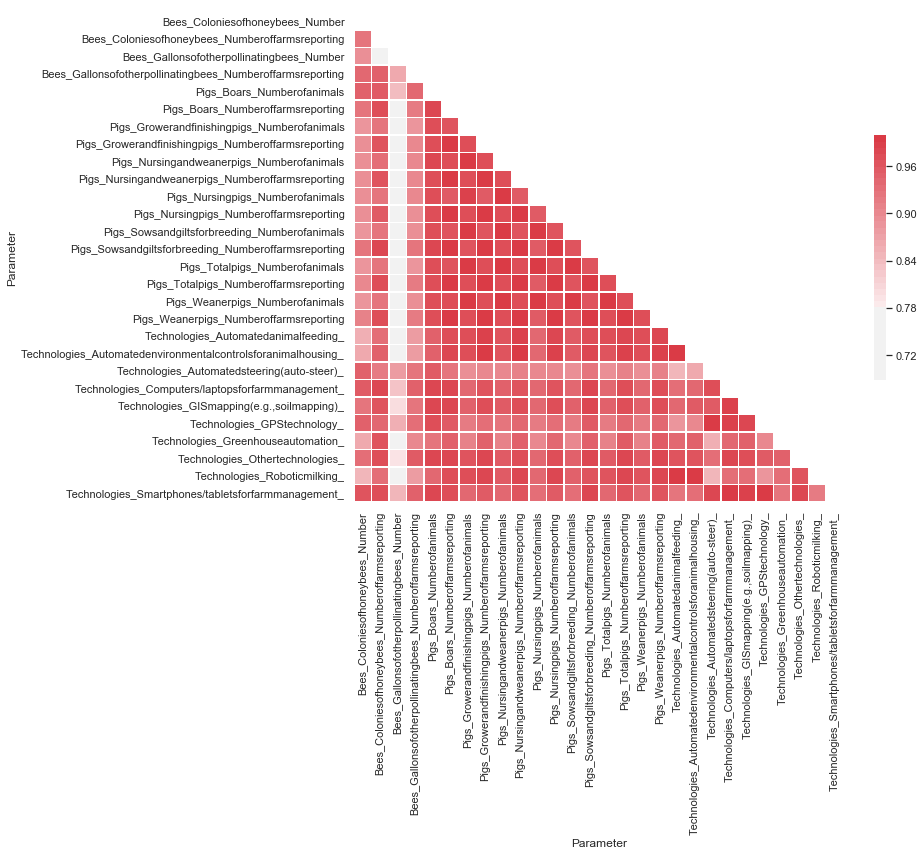

In [8]:


#https://seaborn.pydata.org/examples/many_pairwise_correlations.html

#from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = pivot_tbl.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, sep=20, as_cmap=True)
#cmap = sns.diverging_palette(220, 10, sep=20, as_cmap=True)

cmap = sns.diverging_palette(240, 10, sep=200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})